In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from time import sleep
from urllib.parse import quote
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
import re
from openpyxl import Workbook
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import NoSuchElementException
#-----------------------------------------------------------------
import datetime
import time
import random
import cx_Oracle
import sys
import pandas as pd
import numpy as np
import os
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import *
import statistics as stt
from kiwipiepy import Kiwi
from typing import List
from konlpy.tag import Okt
from textrankr import TextRank

1. Main Keyword 제목 크롤링
2. DB Insert
3. Keyword Count -> Sub Keyword 추출
4. DB Insert
5. Main+Sub 제목 크롤링
6. DB Insert
7. Keyword Count -> Detail Keyword 추출
8. DB Insert
9. Detail 제목, 링크, 크롤링
10.DB Insert
11.Detail 스크립트 크롤링
12.DB Insert
13.스크립트 분석 Kiwi & Text Rank

In [2]:
#db연결-----------------------------------------------------------------------------------------------------------------------
cx_Oracle.init_oracle_client(lib_dir=r"C:\instantclient-basic-windows.x64-21.9.0.0.0dbru\instantclient_21_9")
#-----------------------------------------------------------------------------------------------------------------------------

# 0. 키워드 입력

In [3]:
main_k = input('어떤 키워드를 검색하시겠습니까?? : ')

어떤 키워드를 검색하시겠습니까?? : 퇴직


# 1. Main Keyword 제목 크롤링

In [4]:
def title_crawling(Keyword):
    #원하는 검색어 입력받음
    keyword = Keyword
    
    print("크롤링을 시작합니다.")
    
    #URL 지정 및 실행
    URL = f"https://www.youtube.com/results?search_query={quote(keyword)}"
    driver.get(URL)
    
    print('크롤링 중입니다 ...')
    #필터 버튼 클릭
    driver.find_element(By.XPATH, '//*[@id="container"]/ytd-toggle-button-renderer/yt-button-shape/button/yt-touch-feedback-shape/div/div[2]').click()
    sleep(1)

    #이번 달 클릭
    upload_date = driver.find_element(By.XPATH,'//*[@id="collapse-content"]/ytd-search-filter-group-renderer[1]')
    sleep(1)
    click_list_1 = upload_date.find_elements(By.ID,"endpoint")
    sleep(1)
    click_list_1[3].click()
    sleep(1)
    print('크롤링 중입니다 ...')
    #필터 버튼 클릭
    driver.find_element(By.XPATH, '//*[@id="container"]/ytd-toggle-button-renderer/yt-button-shape/button/yt-touch-feedback-shape/div/div[2]').click()
    sleep(1)
    
    #4~20분 클릭
    length = driver.find_element(By.XPATH,'//*[@id="collapse-content"]/ytd-search-filter-group-renderer[3]')
    sleep(0.5)
    click_list_2 = length.find_elements(By.ID,"endpoint")
    sleep(0.5)
    click_list_2[1].click()
    sleep(1)
    
    print('크롤링 중입니다 ...')
    
    #스크롤 함수 실행
    scroll()

    
    # 페이지 소스 추출
    html_source = driver.page_source
    soup_source = BeautifulSoup(html_source, 'html.parser')

    # 콘텐츠 모든 정보
    content_total = soup_source.find_all(class_ = 'yt-simple-endpoint style-scope ytd-video-renderer')
    # 콘텐츠 제목만 추출
    content_total_title = list(map(lambda data: data.get_text().replace("\n", ""), content_total))
     # 콘텐츠 링크만 추출
    content_total_link = list(map(lambda data: "https://youtube.com" + data["href"], content_total))

    
    list2 = []
    for i in range(len(content_total_title)):
        title = cleansing_sentence(content_total_title[i])
        link = content_total_link[i]
        list2.append([keyword,title,link])
        
    print("크롤링 완료했습니다.")
    
    df = pd.DataFrame(data = list2, columns = ['Keyword','Title','Link'])
    return df

In [5]:
def scroll():
    last_height = driver.execute_script("return document.documentElement.scrollHeight")

    for i in range(10): # 스크롤 횟수 지정
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        #time.sleep(1.5)
        time.sleep(1)

        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height    

In [6]:
def cleansing_sentence(input_string):
    string_pattern = re.compile(r'[^ㄱ-힣 0-9 a-z A-Z]')
    cleansing_string = string_pattern.sub('', input_string)
    return cleansing_string

In [7]:
#크롤링 세팅-------------------------------------------------------------------------------------------------------------------
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--start-maximized')
driver = webdriver.Chrome(chrome_options=chrome_options)
service = Service(ChromeDriverManager().install())
#------------------------------------------------------------------------------------------------------------------------------
mtitle_df = title_crawling(main_k)

C:\Users\Hyeon\AppData\Local\Temp\ipykernel_16132\1881748597.py:4: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


크롤링을 시작합니다.
크롤링 중입니다 ...
크롤링 중입니다 ...
크롤링 중입니다 ...
크롤링 완료했습니다.


In [8]:
mtitle_df

,Keyword,Title,Link
0,퇴직,대기업 퇴사 6개월 현실 조기퇴직자 간절한 조언,https://youtube.com/watch?v=c2XxDlReels&pp=ygU...
1,퇴직,제 노후는 대체 언제 오나요 60이 되면 당연할 줄 알았던 은퇴가 점점 멀어진다쏟아...,https://youtube.com/watch?v=E748ltLdaJk&pp=ygU...
2,퇴직,60년대생의 다음 내직장은 어디일까퇴직은 했지만 은퇴는 없는 은퇴는 했지만 일을 해...,https://youtube.com/watch?v=CjCm2tXHAFc&pp=ygU...
3,퇴직,정년퇴직 앞두고 사고 쳤어요 산을 구입해 30년 친구놈과 함께 쓸 농막을 만들었다프...,https://youtube.com/watch?v=UF_GdKWhWEI&pp=ygU...
4,퇴직,공무원 30년차 퇴직 후 법무사전문직 현실고백,https://youtube.com/watch?v=SmBj3qtI5yE&pp=ygU...
...,...,...,...
209,퇴직,40대 50대 은퇴준비 은퇴 후 어떤일을 해야할까 1인기업 퇴직후 직업,https://youtube.com/watch?v=4iY2A9uj3fg&pp=ygU...
210,퇴직,은퇴 후 버킷리스트는 노후준비는 중산층 자산관리전략 1,https://youtube.com/watch?v=Nj1m8S6cnYI&pp=ygU...
211,퇴직,퇴직연금펀드 분석 3 KB퇴직연금배당40채혼펀드는 어떻게 할까요,https://youtube.com/watch?v=pxLWgxOSCZY&pp=ygU...
212,퇴직,가계부채 3000조 시대에 금융상품으로 노후 준비할 여유가 있을까요,https://youtube.com/watch?v=Ht3hBtpy32I&pp=ygU...


# 2. DB Insert

In [9]:
def db_reset(dbname):
    DB=dbname
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')

    cs = conn.cursor()
    
    sql = f"DELETE FROM {DB}"
    cs.execute(sql)
    deleted_rows = cs.rowcount
    print(f"{deleted_rows} rows deleted")
    print('')
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [10]:
def a_mtitle_insert(DF): 
    df = DF
    Main_k = list(df['Keyword'])
    Link = list(df['Link'])
    Title = list(df['Title'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        main_k = Main_k[i]
        link = Link[i]
        title = Title[i]
        sql = "INSERT INTO A_MTITLE (MAIN_K, LINK, TITLE) VALUES (:1, :2, :3)"
        cs.execute(sql, (main_k, link, title))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [11]:
# db_reset('A_MTITLE')

In [12]:
a_mtitle_insert(mtitle_df)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 3. Keyword Count -> Sub Keyword 추출

In [13]:
def okt_noun_count(column):
    okt = Okt()
    arr = np.array(column)
    temp = []
    for i in range(len(arr)):
        temp.append(okt.nouns(arr[i]))
    noun = sum(temp,[])
    df = pd.DataFrame({'Noun':noun})
    noun_set = set(noun)
    noun_kind = list(noun_set)
    num=[]
    j=0
    for i in range(len(noun_kind)):
        num.append(len(df[df['Noun']==noun_kind[j]]))
        j=j+1
    #데이터프레임 생성 및 정렬
    df1 = pd.DataFrame({'Noun':noun_kind,'count':num})
    df1s = df1.sort_values('count',ascending=False)
    return df1s

In [14]:
mtitle_noun_count = okt_noun_count(mtitle_df['Title']).head(20)

In [15]:
mtitle_noun_count

,Noun,count
821,퇴직,159
582,연금,56
15,후,55
247,은퇴,51
911,노후,32
109,정년,23
749,준비,20
260,이유,16
701,생활,16
660,공무원,14


# 4. DB Insert

In [16]:
def a_m_count_insert(DF): 
    df = DF
    Noun = list(df['Noun'])
    Count = list(df['count'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        sub_k = Noun[i]
        count = Count[i]
        sql = "INSERT INTO A_M_COUNT (MAIN_K, NOUN, COUNT) VALUES (:1, :2, :3)"
        cs.execute(sql, (main_k, sub_k, count))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [17]:
# db_reset('A_M_COUNT')

In [18]:
a_m_count_insert(mtitle_noun_count)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 5. Main+Sub 제목 크롤링

In [19]:
msub_k = '퇴직 연금'

In [21]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--start-maximized')
driver = webdriver.Chrome(chrome_options=chrome_options)
service = Service(ChromeDriverManager().install())
#------------------------------------------------------------------------------------------------------------------------------
mstitle_df = title_crawling(msub_k)

C:\Users\Hyeon\AppData\Local\Temp\ipykernel_16132\1958263933.py:3: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


크롤링을 시작합니다.
크롤링 중입니다 ...
크롤링 중입니다 ...
크롤링 중입니다 ...
크롤링 완료했습니다.


In [22]:
mstitle_df

,Keyword,Title,Link
0,퇴직 연금,IRP한도 3000만원 사적연금 2000만원 세액공제 165단일화 사적연금활성화 추진,https://youtube.com/watch?v=xKBvwDqUYHs&pp=ygU...
1,퇴직 연금,퇴직 전에 IRP계좌 3개는 꼭 만들어야하는 이유,https://youtube.com/watch?v=QzkCrfZuXHk&pp=ygU...
2,퇴직 연금,사적연금이 국민연금보다 낫지 않나요,https://youtube.com/watch?v=_XaJV7m-sic&pp=ygU...
3,퇴직 연금,통장에 이만큼 넣어두세요 노후준비 충분합니다 최소 월 350만원씩 평생 나와요 안...,https://youtube.com/watch?v=YBRbtCHxPW8&pp=ygU...
4,퇴직 연금,돈을 부르는 퇴직연금 EP 1 당신이 돈을 부르지 못했던 이유 퇴직연금 기초부터 쌓자,https://youtube.com/watch?v=bb8J_3QtLUA&pp=ygU...
...,...,...,...
208,퇴직 연금,우선 1억 모아서 이렇게 하세요 노후 걱정 끝입니다 가장 확실한 노후 준비 저는 6...,https://youtube.com/watch?v=QDOGLQ3mf1w&pp=ygU...
209,퇴직 연금,KBSTAR ETF 인터뷰 노후 대비에 최적화된 ETF 주식 투자 꼭 연금 계좌로 ...,https://youtube.com/watch?v=m3v932yQxBo&pp=ygU...
210,퇴직 연금,빠른세법 소득세 퇴직소득 요약하기 소득세 14 No BGM,https://youtube.com/watch?v=2fth7RhH6Sc&pp=ygU...
211,퇴직 연금,불 끄던 소방관 40대에 파이어 성공은퇴 후에도 月 500만원 버는 비법싱글파이어,https://youtube.com/watch?v=RjFs2zfOWx8&pp=ygU...


# 6. DB Insert

In [23]:
def a_mstitle_insert(DF): 
    df = DF
    MSUB_K = list(df['Keyword'])
    Link = list(df['Link'])
    TITLE = list(df['Title'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        msub_k = MSUB_K[i]
        link = Link[i]
        title = TITLE[i]
        sql = "INSERT INTO A_MSTITLE (MSUB_K, LINK, TITLE) VALUES (:1, :2, :3)"
        cs.execute(sql, (msub_k, link, title))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [24]:
# db_reset('a_MSTITLE')

In [25]:
a_mstitle_insert(mstitle_df)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 7. Keyword Count -> Detail Keyword 추출

In [26]:
mstitle_noun_count = okt_noun_count(mstitle_df['Title']).head(20)

In [30]:
mstitle_noun_count

,Noun,count
434,연금,178
602,퇴직,53
671,노후,51
213,기초,38
188,은퇴,32
179,국민연금,28
558,준비,25
637,저축,24
69,투자,19
438,방법,19


# 8. DB Insert

In [31]:
def a_ms_count_insert(DF): 
    df = DF
    Noun = list(df['Noun'])
    Count = list(df['count'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        det_k = Noun[i]
        count = Count[i]
        sql = "INSERT INTO A_MS_COUNT (MAINSUB_K, NOUN, COUNT) VALUES (:1, :2, :3)"
        cs.execute(sql, (msub_k, det_k, count))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [32]:
# db_reset('A_MS_COUNT')

In [33]:
a_ms_count_insert(mstitle_noun_count)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 9. Detail 제목, 링크, 크롤링

In [34]:
msdet_k = '퇴직 연금 '

In [41]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--start-maximized')
driver = webdriver.Chrome(chrome_options=chrome_options)
service = Service(ChromeDriverManager().install())
#------------------------------------------------------------------------------------------------------------------------------
msdtitle_df = title_crawling(msdet_k)

C:\Users\Hyeon\AppData\Local\Temp\ipykernel_13008\1902167926.py:3: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


크롤링을 시작합니다.
크롤링 중입니다 ...
크롤링 중입니다 ...
크롤링 중입니다 ...
크롤링 완료했습니다.


In [42]:
msdtitle_df

,Keyword,Title,Link
0,ESG 경영 한국,한국노총 부천김포지역지부 2023 노사공동 ESG 경영 활성화 연수,https://youtube.com/watch?v=SyCBXbX9bGc&pp=ygU...
1,ESG 경영 한국,경제를 말하다 ESG는 계획이 다 있구나,https://youtube.com/watch?v=1aNEEg-1yJM&pp=ygU...
2,ESG 경영 한국,성공예감 이대호입니다 트렌드 팔로우 귀에 쏙쏙 들어오는 ESG 경영 이야기 국내외 ...,https://youtube.com/watch?v=6YI488yrgtY&pp=ygU...
3,ESG 경영 한국,한국환경산업기술원 2023년 브리핑 NEWS Part1 ESG확산을 위해 애쓰지ESG,https://youtube.com/watch?v=1UOZFxMhBMo&pp=ygU...
4,ESG 경영 한국,2023 코트라 출제예상 시사주제 ESG경영 대중국 무역정책,https://youtube.com/watch?v=qSKZ_3RKHxI&pp=ygU...
...,...,...,...
184,ESG 경영 한국,펀드로 돈 버는 쉬운 방법 연금저축 IRP 투자 가이드,https://youtube.com/watch?v=I_3VD_DRheY&pp=ygU...
185,ESG 경영 한국,23년 6월 15일 해외축구 분석 챔피언스리그 스포츠토토 토토 승부식 승...,https://youtube.com/watch?v=qO2sqE68aHc&pp=ygU...
186,ESG 경영 한국,OZ 올티비 67회 신속한 판단으로 표창 받은 우리 승무원 그리고 안전 운항 위해 ...,https://youtube.com/watch?v=wWCE_4AxMy0&pp=ygU...
187,ESG 경영 한국,LG화학 LG에너지솔루션 지분 매각 소식 및 기업리포트 2건 목표주가는,https://youtube.com/watch?v=zdTuAgzLCbE&pp=ygU...


# 10.DB Insert

In [43]:
def a_msdtitle_insert(DF): 
    df = DF
    Msdet_k = list(df['Keyword'])
    Link = list(df['Link'])
    Title = list(df['Title'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        msdet_k = Msdet_k[i]
        link = Link[i]
        title = Title[i]
        sql = "INSERT INTO A_MSDTITLE (MSDET_K, LINK, TITLE) VALUES (:1, :2, :3)"
        cs.execute(sql, (msdet_k, link, title))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [44]:
# db_reset('A_MSDTITLE')


DB Connect 성공!!

111 rows deleted

Commit 완료!!

DB Disconnect 완료!!



In [45]:
a_msdtitle_insert(msdtitle_df)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 11.Detail 스크립트 크롤링

In [46]:
def script_crawling(dbname):
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    cs = conn.cursor()
    
    sql = f"SELECT LINK FROM {dbname}"
    cs.execute(sql)
    links = cs.fetchall()
    
    cs.close()
    conn.close()
    
    det_k = msdet_k
    
#     print(links)
    list3= []
    for link in links:
        
        #URL 실행
        URL = link[0]
        driver.get(URL)

        wb = Workbook(write_only=True)
        ws = wb.create_sheet()

        driver.implicitly_wait(5)

        time.sleep(1.5)

        driver.find_element(By.XPATH, '//*[@id="button-shape"]/button/yt-touch-feedback-shape/div').click()
        time.sleep(1)
        try:
            driver.find_element(By.XPATH, '//*[@id="items"]/ytd-menu-service-item-renderer[1]/tp-yt-paper-item').click()
            time.sleep(1)
        except NoSuchElementException:
            continue
        except ElementNotInteractableException:
            continue
        
        html_source = driver.page_source
        soup = BeautifulSoup(html_source, 'html.parser')

         #-------------------------------------------------------------------------------------------#
        scipt_html = soup.find_all('yt-formatted-string', class_='segment-text style-scope ytd-transcript-segment-renderer')
        
        
        for i in range(len(scipt_html)):
            temp_comment = scipt_html[i].text
            temp_comment = cleansing_sentence(temp_comment)
            list3.append([det_k,URL,temp_comment])
            
            
    df=pd.DataFrame(data = list3, columns = ['Keyword','Url','Script'])        
    return df

In [47]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--start-maximized')
driver = webdriver.Chrome(chrome_options=chrome_options)
service = Service(ChromeDriverManager().install())
#------------------------------------------------------------------------------------------------------------------------------
a_script_df = script_crawling('a_msdtitle')

C:\Users\Hyeon\AppData\Local\Temp\ipykernel_13008\1810604671.py:3: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


In [48]:
a_script_df

,Keyword,Url,Script
0,ESG 경영 한국,https://youtube.com/watch?v=cxhTjlh5iJE&pp=ygU...,여러분 안녕하십니까
1,ESG 경영 한국,https://youtube.com/watch?v=cxhTjlh5iJE&pp=ygU...,지난해 우리나라 인구가 12만 3천명
2,ESG 경영 한국,https://youtube.com/watch?v=cxhTjlh5iJE&pp=ygU...,줄어든 걸로 나타났습니다
3,ESG 경영 한국,https://youtube.com/watch?v=cxhTjlh5iJE&pp=ygU...,태어나는 아기 숫자가
4,ESG 경영 한국,https://youtube.com/watch?v=cxhTjlh5iJE&pp=ygU...,계속
...,...,...,...
48636,ESG 경영 한국,https://youtube.com/watch?v=M7ZjoT1HnjE&pp=ygU...,제품을 소비자들의 눈을 뜨게 한다면
48637,ESG 경영 한국,https://youtube.com/watch?v=M7ZjoT1HnjE&pp=ygU...,올리브영을 찾는 10에서 20대의
48638,ESG 경영 한국,https://youtube.com/watch?v=M7ZjoT1HnjE&pp=ygU...,주요소비층을 확보할 수 있을 것입니다
48639,ESG 경영 한국,https://youtube.com/watch?v=M7ZjoT1HnjE&pp=ygU...,이상으로 발표 마치겠습니다


# 12.DB Insert

In [52]:
def a_script_insert(DF): 
    df = DF
    Keyword = list(df['Keyword'])
    Link = list(df['Url'])
    Script = list(df['Script'])
        
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        keyword = Keyword[i]
        link = Link[i]
        script = Script[i]
        sql = "INSERT INTO A_SCRIPT (KEYWORD, LINK, SCRIPT) VALUES (:1, :2, :3)"
        cs.execute(sql, (keyword, link, script))
        if i%50 ==0:
            conn.commit()
        print('Commit 완료!!')
        print('')
    
    cs.close()
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [ ]:
# db_reset('A_SCRIPT')

In [53]:
a_script_insert(a_script_df)


DB Connect 성공!!

48641 rows deleted

Commit 완료!!

DB Disconnect 완료!!


DB Connect 성공!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

C

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!

Commit 완료!!


# 13.스크립트 분석 Kiwi & Text Rank

In [54]:
kiwi = Kiwi()

In [55]:
script = list(a_script_df['Script'])

In [56]:
text_lump = ''.join(script)

In [57]:
tl_sents = kiwi.split_into_sents(text_lump)

In [58]:
sentence_list = []
for i in range(len(tl_sents)):
    sentence_list.append(tl_sents[i][0])

In [59]:
sentence_list

['여러분 안녕하십니까',
 '지난해 우리나라 인구가 12만 3천명줄어든 걸로 나타났습니다태어나는 아기 숫자가계속줄고 있기 때문입니다',
 '우리나라 합계출산율이 078명으로통계를 늘기 시작한 이후 가장 낮았고oecd의 회원국 가운데에서도꼴찌였습니다',
 '박수안녕하십니까 한림건축 부동산 TV황태성입니다',
 '오늘 한림건축 부동산tv에서는 심각한 수준의 대한민국인구 감소에 대한 팩트를 체크합니다출산율 감소 고령인구 증가 그리고일리인 가구수 증가를 맞이하는현실과이를 극복하기 위한 대한민국부동산의 미래를 전망해 봅니다',
 '먼저 인구수 감소부터 내용을 보도록하겠습니다',
 '2022년 12월 기준 인구수는 약51439038명으로 전년도 대비약 20만명이 감소했습니다',
 '20만명이라는 인구수는용산구 전체 인구수와 맞먹는 엄청난수치입니다',
 '1년 만에 한개구의 인구가감소한 것입니다',
 '이미 우리나라의 경우2019년 말 기점으로 인구 감소는현실이 되었으며앞으로 더 큰 폭으로 인구감소가지속될 것으로 전망되었습니다표를 보면 알 수 있듯이2050년에 이르면 총 인구수가4300만여 명으로약 800만 명이 감소됩니다800만 명이란 인구를서울인 이제 대입해 보겠습니다',
 '2023년 4월 기준 현재서울 인구수가9422710명인 것을 감안하면2050년에는서울 인구의 약 85인 800만명이사라진다는섬뜻한 숫자인 것입니다',
 '여기서 잠시출생률을 짚어보겠습니다',
 '우리나라 인구감소의 가장 직접적인 원인은 매년낮아지는 합계 출산율 때문입니다',
 '2022년 한국의 합계 출산율은078명입니다',
 '이는OECD 38개국은 물론 전 세계200여개 국가 중 최저 기록입니다',
 '한국 정부는 지난 2006년부터2022년까지약 380조원이라는막대한 예산을 인구 정책에쏟아부었습니다',
 '이우스는2006년에서2015년까지 반짝 증가했었습니다',
 '하지만 그 이후 내리 곤두박질치며인구 절벽이라는 위험 신호를 보내고있습니다',
 '다음은 1인 가구수 증가입니다',
 '초인구

In [60]:
class MyTokenizer:
    def __call__(self, text: str) -> List[str]:
        tokens: List[str] = text.split()
        return tokens

In [61]:
class OktTokenizer:
    okt: Okt = Okt()

    def __call__(self, text: str) -> List[str]:
        tokens: List[str] = self.okt.phrases(text)
        return tokens

In [62]:
text = '.'.join(sentence_list)

In [63]:
mytokenizer: MyTokenizer = MyTokenizer()
textrank: TextRank = TextRank(mytokenizer)

k: int = 30

summaries: List[str] = textrank.summarize(text, k, verbose=False)

list4 = []
for summary in summaries:
    list4.append([msdet_k,summary])

In [64]:
scr_ana_df = pd.DataFrame(data = list4, columns = ['keyword','sentence'])

# 14.DB Insert

In [69]:
def a_scr_ans_insert(DF): 
    df = DF
    Keyword = list(df['keyword'])
    Sent = list(df['sentence'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        keyword = Keyword[i]
        sent = Sent[i]
        sql = "INSERT INTO A_SCR_ANA (DET_K, SENTENCE) VALUES (:1, :2)"
        cs.execute(sql, (keyword, sent))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [ ]:
# db_reset('A_SCR_ANA')

In [70]:
a_scr_ans_insert(scr_ana_df)


DB Connect 성공!!

0 rows deleted

Commit 완료!!

DB Disconnect 완료!!


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 추가 분석 및 시각화

In [99]:
scr_noun_df = okt_noun_count(a_script_df['Script']).head(20)

In [100]:
scr_noun_df

,Noun,count
2379,것,1998
4727,수,1735
8438,그,1468
2400,거,1318
54,이제,1264
2500,좀,1085
640,지금,846
5253,기업,811
134,또,766
2952,제,764


In [101]:
def word_cloud(a,b,name = 'Moda'):
    xdata = a
    ydata = b
    
    cand_mask=np.array(Image.open('circle.jpg'))

    nword = xdata

    ncount = ydata

    words = dict(zip(nword,ncount))

    wordcloud = WordCloud(
        font_path = 'malgun.ttf', # 한글 글씨체 설정
        background_color='white', # 배경색은 흰색으로 
        colormap='Blues', # 글씨색은 빨간색으로
        mask=cand_mask, # 워드클라우드 모양 설정
    ).generate_from_frequencies(words)

    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    
    plt.savefig(f"C:/Users/Hyeon/Desktop/DogDig/{name}")

In [102]:
mtitle_noun_count

,Noun,count
182,경영,12
125,환경,7
101,편,6
86,실천,4
9,탄소,4
202,기업,4
108,사회,3
142,정책,3
119,중립,3
64,국제,2


In [103]:
mt_word = list(mtitle_noun_count['Noun'])
mt_count = list(mtitle_noun_count['count'])

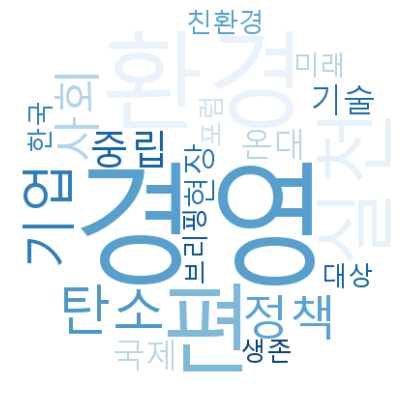

In [104]:
word_cloud(mt_word, mt_count, 'ESG')

In [105]:
mstitle_noun_count

,Noun,count
553,채권,24
1157,주가,22
226,경영,20
37,이,19
354,종목,15
594,기업,13
210,산업,13
243,위,12
1054,편,12
952,관리,11


In [106]:
ms_word = list(mstitle_noun_count['Noun'])
ms_count = list(mstitle_noun_count['count'])

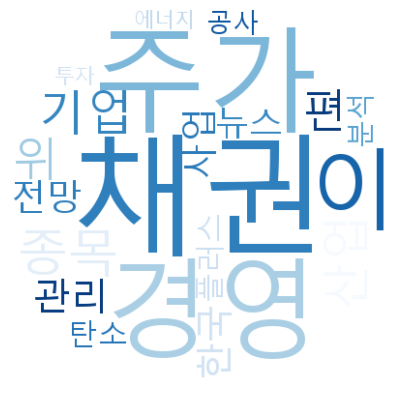

In [107]:
word_cloud(ms_word, ms_count, 'ESG경영')